In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

# Reading the data

## Finding GeoJSON or Shapefiles for Any Region

If you cannot find a GeoJSON file for the region you're interested in, you can search for shapefiles instead. Shapefiles are a common format for geographic data and can be converted to GeoJSON format. This way, you can work with geographic data for any region you need.

To find shapefiles, you can use search terms like "shapefile [region name]" on Google or specialized geographic data repositories.

For example, to convert a shapefile into GeoJSON, you can follow the instructions provided in the link below:

https://www.statsilk.com/maps/convert-esri-shapefile-map-geojson-format

By following these steps, you can obtain and use geographic data for any region in your analysis.

In [13]:
# Read the borders of the countries in South America from a GeoJSON file
gdf = geopandas.read_file("SA.geojson")
gdf.head()

,name,geometry
0,French Guiana,"POLYGON ((-52.28892 4.87612, -52.32461 4.77090..."
1,Brazil,"MULTIPOLYGON (((-48.48589 -27.76699, -48.55459..."
2,Chile,"MULTIPOLYGON (((-67.57519 -55.88965, -67.61143..."
3,Argentina,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."
4,Bolivia,"POLYGON ((-58.15977 -20.16465, -58.13994 -19.9..."


In [14]:
# This is the data we want to show as a map
# Density is given in people/km²
df = pd.read_csv("SA_data.csv")
df.head()

,name,Density,Population
0,French Guiana,4,294071
1,Brazil,25,212559417
2,Chile,25,18952038
3,Argentina,16,44938712
4,Bolivia,10,11513100


Merge the dataframes to associate Population and Population Density with the geographical borders of each country

In [15]:
gdf = pd.merge(gdf, df, on="name")
gdf.head()

,name,geometry,Density,Population
0,French Guiana,"POLYGON ((-52.28892 4.87612, -52.32461 4.77090...",4,294071
1,Brazil,"MULTIPOLYGON (((-48.48589 -27.76699, -48.55459...",25,212559417
2,Chile,"MULTIPOLYGON (((-67.57519 -55.88965, -67.61143...",25,18952038
3,Argentina,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882...",16,44938712
4,Bolivia,"POLYGON ((-58.15977 -20.16465, -58.13994 -19.9...",10,11513100


# Creating the final geojson files
We will create 2 geojson files: one for population and another for population density.

We will rename the fields "Population" and "Density" to "value". This way, both files will have the same structure, which will make it easier to create the maps in JavaScript.

In [16]:
pop = gdf.drop(["Density"], axis=1)
pop = pop.rename(columns={"Population": "value"})
pop

,name,geometry,value
0,French Guiana,"POLYGON ((-52.28892 4.87612, -52.32461 4.77090...",294071
1,Brazil,"MULTIPOLYGON (((-48.48589 -27.76699, -48.55459...",212559417
2,Chile,"MULTIPOLYGON (((-67.57519 -55.88965, -67.61143...",18952038
3,Argentina,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882...",44938712
4,Bolivia,"POLYGON ((-58.15977 -20.16465, -58.13994 -19.9...",11513100
5,Colombia,"MULTIPOLYGON (((-78.11372 2.54175, -78.14082 2...",50339443
6,Ecuador,"MULTIPOLYGON (((-80.13159 -2.97315, -80.15068 ...",17373662
7,Guyana,"POLYGON ((-57.19477 5.54844, -57.24790 5.48525...",782766
8,Peru,"POLYGON ((-69.96592 -4.23594, -69.97202 -4.301...",32510453
9,Paraguay,"POLYGON ((-58.15977 -20.16465, -58.13779 -20.2...",7044636


In [17]:
# saving the file
pop.to_file("population.geojson", driver="GeoJSON")

## Now do the same to density

In [18]:
den = gdf.drop(["Population"], axis=1)
den = den.rename(columns={"Density": "value"})
den

,name,geometry,value
0,French Guiana,"POLYGON ((-52.28892 4.87612, -52.32461 4.77090...",4
1,Brazil,"MULTIPOLYGON (((-48.48589 -27.76699, -48.55459...",25
2,Chile,"MULTIPOLYGON (((-67.57519 -55.88965, -67.61143...",25
3,Argentina,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882...",16
4,Bolivia,"POLYGON ((-58.15977 -20.16465, -58.13994 -19.9...",10
5,Colombia,"MULTIPOLYGON (((-78.11372 2.54175, -78.14082 2...",46
6,Ecuador,"MULTIPOLYGON (((-80.13159 -2.97315, -80.15068 ...",56
7,Guyana,"POLYGON ((-57.19477 5.54844, -57.24790 5.48525...",4
8,Peru,"POLYGON ((-69.96592 -4.23594, -69.97202 -4.301...",25
9,Paraguay,"POLYGON ((-58.15977 -20.16465, -58.13779 -20.2...",18


In [19]:
# saving the file
den.to_file("density.geojson", driver="GeoJSON")

# Creating Static Maps
If you don't need interactive maps (which the user can select what they want to see), you can use GeoPandas to create static maps (images).

In [20]:
# List of capital cities with their respective coordinates
capital_cities = [
    ["Buenos Aires, Argentina", -34.6037, -58.3816],
    ["Sucre, Bolivia", -19.0196, -65.2617],
    ["Brasília, Brazil", -15.7934, -47.8825],
    ["Santiago, Chile", -33.4489, -70.6693],
    ["Bogotá, Colombia", 4.7110, -74.0721],
    ["Quito, Ecuador", -0.1807, -78.4678],
    ["Georgetown, Guyana", 6.8013, -58.1551],
    ["Asunción, Paraguay", -25.2637, -57.5759],
    ["Lima, Peru", -12.0464, -77.0428],
    ["Paramaribo, Suriname", 5.8520, -55.2038],
    ["Montevideo, Uruguay", -34.9011, -56.1645],
    ["Caracas, Venezuela", 10.4806, -66.9036]
]

names, lat, lon = zip(*capital_cities)

GeoPandas plot method is based in matplotlib, so you can plot the map along with whatever you want, in this case I'm plotting the capital cities of the countries.

You can learn more about the kwargs you can use with the plot method in https://geopandas.org/en/stable/docs/user_guide/mapping.html

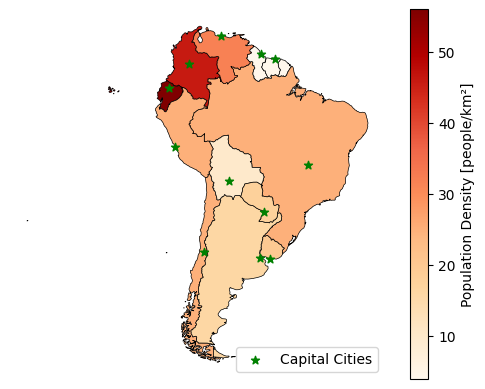

In [21]:
fig, ax = plt.subplots()

gdf.plot(
    column="Density",
    ax=ax,
    cmap="OrRd",
    edgecolor='black',
    linewidth=0.5,
    legend=True,
    legend_kwds={"label": "Population Density [people/km²]"}
)

# Adding the capital cities
plt.scatter(lon, lat, color="green", marker="*", label="Capital Cities")
plt.legend(loc='lower right')

ax.set_axis_off();
plt.show()

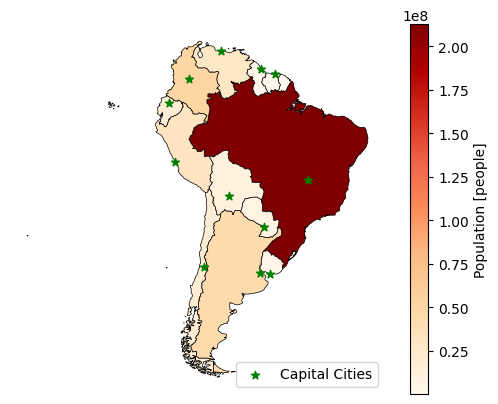

In [22]:
# Doing the exact same to population
fig, ax = plt.subplots()

gdf.plot(
    column="Population",
    ax=ax,
    cmap="OrRd",
    edgecolor='black',
    linewidth=0.5,
    legend=True,
    legend_kwds={"label": "Population [people]"}
)

plt.scatter(lon, lat, color="green", marker="*", label="Capital Cities")
plt.legend(loc='lower right')

ax.set_axis_off();
plt.show()